<a href="https://colab.research.google.com/github/SurekhaBerlin/Credit-Card-Fraud-Prediction-using-ML/blob/main/Credit_Card_Fraud_Prediction_using_ML_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## STEP 1: Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import warnings
warnings.filterwarnings('ignore')

## STEP 2: Reading the CSV files  & Shape of the dataset

In [2]:
df = pd.read_csv('/content/creditcard.csv')

In [3]:
df.shape

(53571, 31)

## STEP 3: Displaying the 5 rows in the dataset

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


## STEP 4: Displaying the dataset information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53571 entries, 0 to 53570
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    53571 non-null  int64  
 1   V1      53571 non-null  float64
 2   V2      53571 non-null  float64
 3   V3      53571 non-null  float64
 4   V4      53571 non-null  float64
 5   V5      53571 non-null  float64
 6   V6      53571 non-null  float64
 7   V7      53571 non-null  float64
 8   V8      53571 non-null  float64
 9   V9      53571 non-null  float64
 10  V10     53571 non-null  float64
 11  V11     53571 non-null  float64
 12  V12     53571 non-null  float64
 13  V13     53571 non-null  float64
 14  V14     53571 non-null  float64
 15  V15     53571 non-null  float64
 16  V16     53571 non-null  float64
 17  V17     53571 non-null  float64
 18  V18     53571 non-null  float64
 19  V19     53571 non-null  float64
 20  V20     53571 non-null  float64
 21  V21     53571 non-null  float64
 22

## STEP 5: Displaying the Descriptive Statistics

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,53571.000000,53571.000000,53571.000000,53571.000000,53571.000000,53571.000000,53571.000000,53571.000000,53571.000000,53571.000000,...,53571.000000,53571.000000,53570.000000,53570.000000,53570.000000,53570.000000,53570.000000,53570.000000,53570.000000,53570.000000
mean,30004.864404,-0.243182,0.000586,0.691588,0.179664,-0.257872,0.102917,-0.119311,0.052872,0.094530,...,-0.028932,-0.106714,-0.039090,0.007830,0.135096,0.020158,0.003957,0.003972,94.260870,0.002856
std,13302.545313,1.879598,1.639428,1.483708,1.393856,1.411097,1.313136,1.271570,1.214929,1.201748,...,0.731807,0.636939,0.593273,0.596080,0.438590,0.500092,0.388427,0.329538,252.290845,0.053366
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.000000
25%,23663.500000,-0.994263,-0.573628,0.212411,-0.724005,-0.873897,-0.636806,-0.606014,-0.147112,-0.630279,...,-0.230582,-0.528974,-0.179410,-0.322721,-0.128328,-0.330573,-0.063648,-0.006589,7.680000,0.000000
50%,34251.000000,-0.249472,0.078153,0.790661,0.189575,-0.290113,-0.152437,-0.075304,0.058859,-0.012999,...,-0.066124,-0.082370,-0.051736,0.062416,0.174351,-0.073699,0.008850,0.022405,25.495000,0.000000
75%,40127.000000,1.154647,0.732455,1.424778,1.061933,0.281788,0.493733,0.425496,0.333521,0.780864,...,0.110098,0.307953,0.079102,0.401967,0.421204,0.298577,0.083071,0.076498,86.867500,0.000000
max,46050.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,1.000000


## STEP 6 : Displaying the columns

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## STEP 7 : Checking the Null values

In [8]:

df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [9]:
# Dropping the time column
df.drop(['Time'], axis=1, inplace=True)

## STEP 8 : Checking the Duplicate values

In [10]:
df.duplicated().any()

True

In [11]:

df = df.drop_duplicates()

In [12]:
df.shape

(52399, 30)

## STEP 9: Standard Scaler

In [13]:
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))


In [14]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,0.212471
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,-0.365673
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,1.113703
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,0.109693
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,-0.100859


In [15]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,0.212471
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,-0.365673
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,1.113703
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,0.109693
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,-0.100859


## STEP 10 : Not handling imbalanced data

In [16]:
df['Class'].value_counts()

,count
Class,
0.0,52245
1.0,153


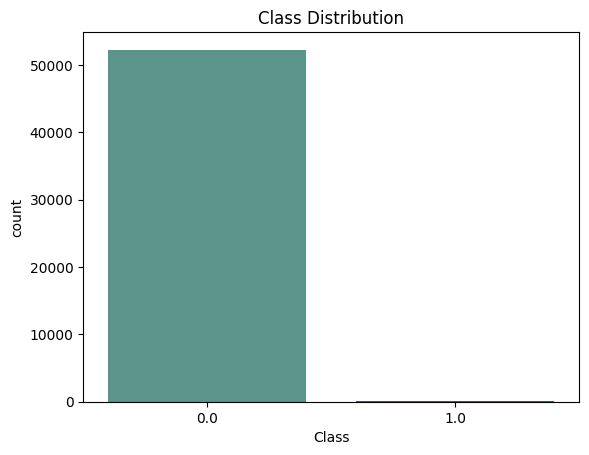

In [17]:

sns.countplot(x='Class', data=df, palette='crest')
plt.title('Class Distribution')
plt.show()


## STEP 11 : Data Analysis

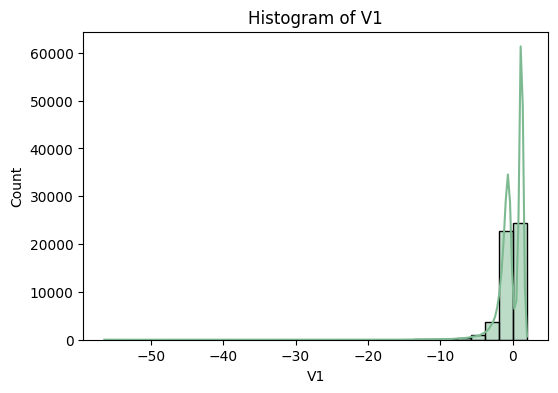

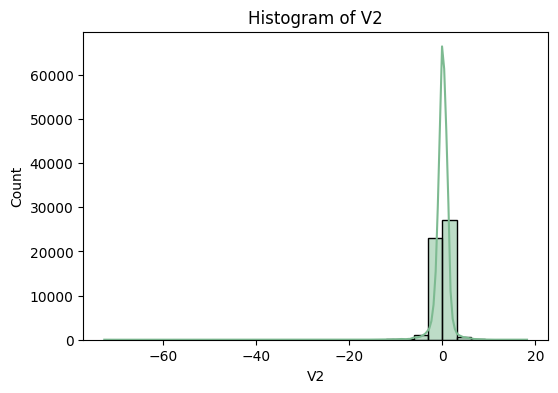

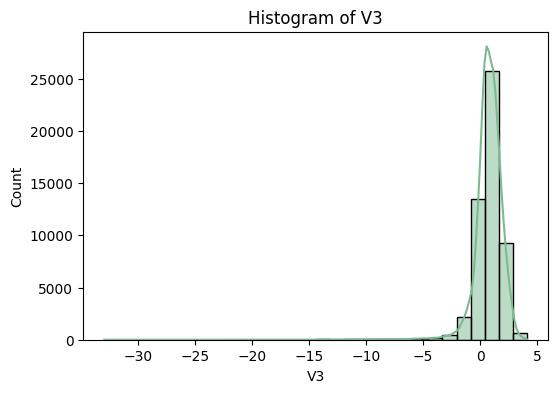

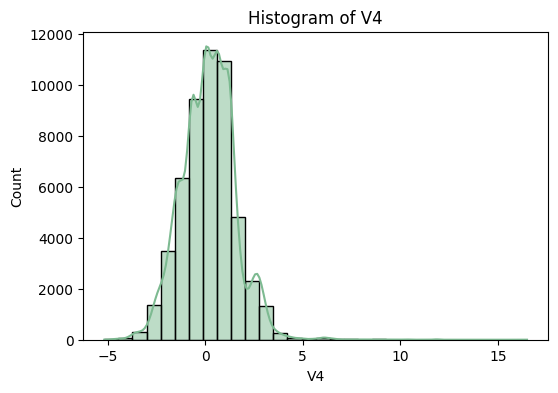

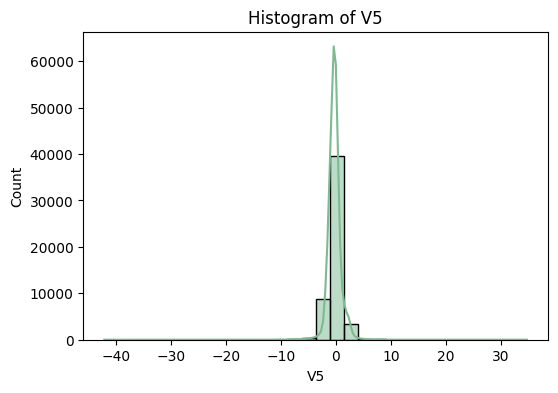

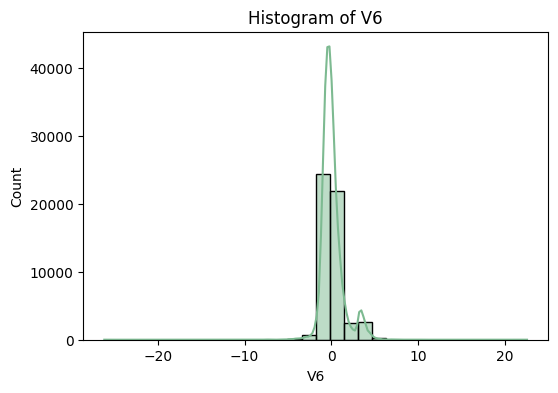

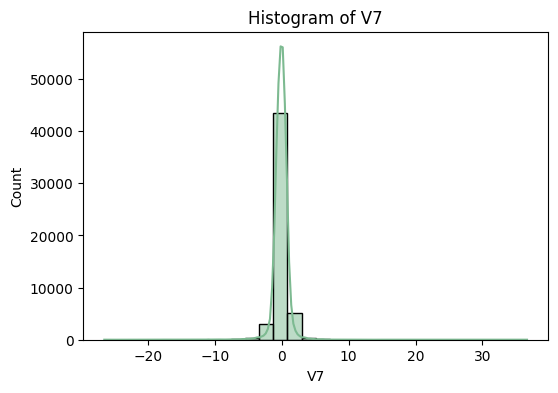

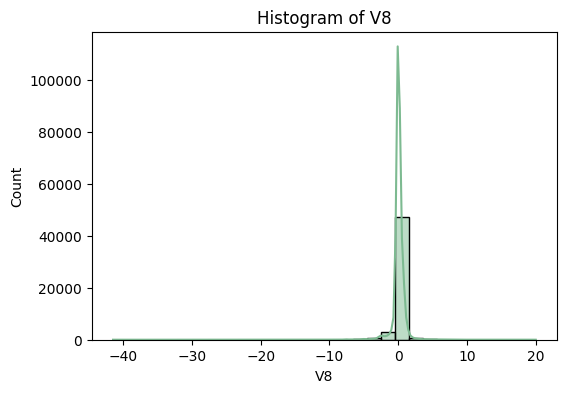

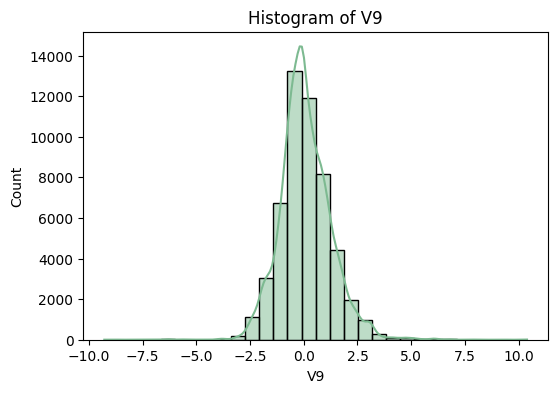

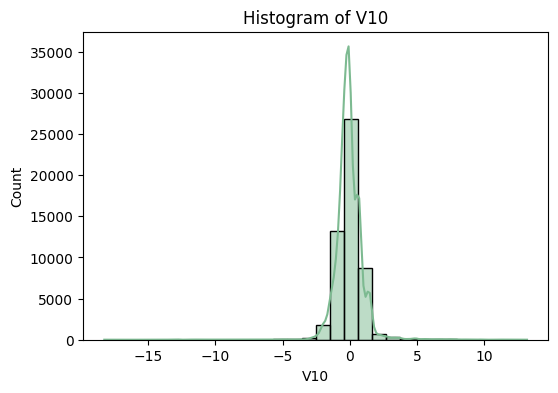

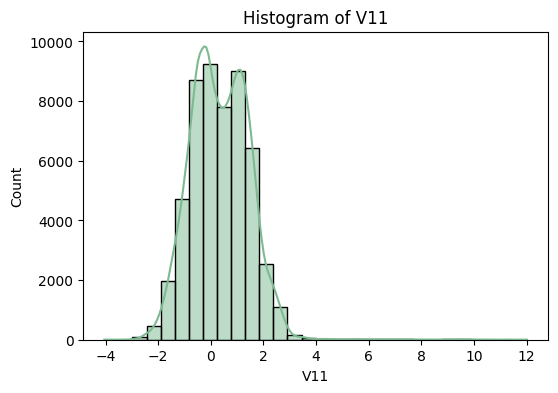

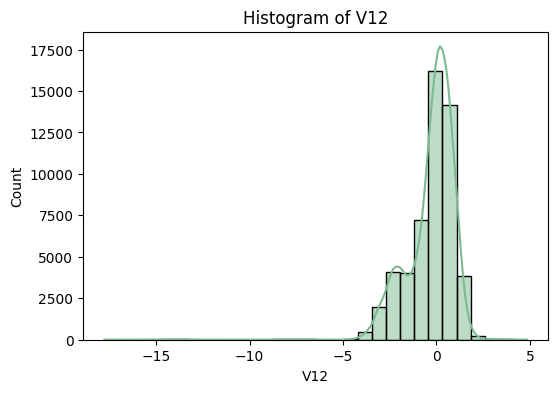

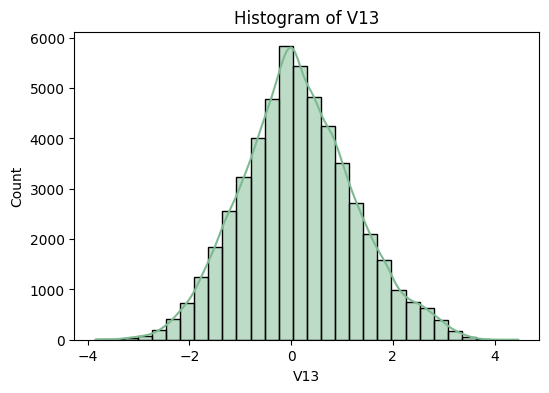

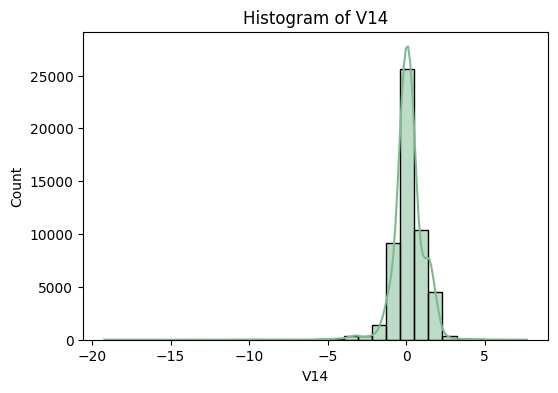

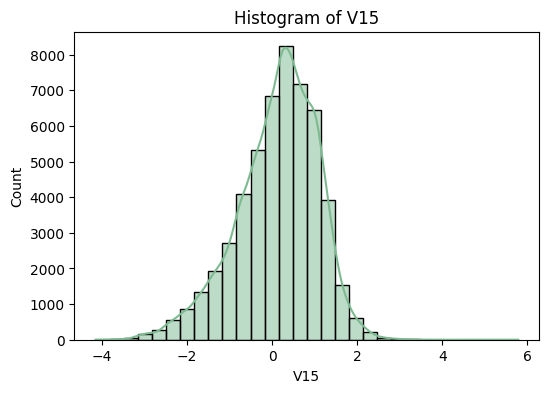

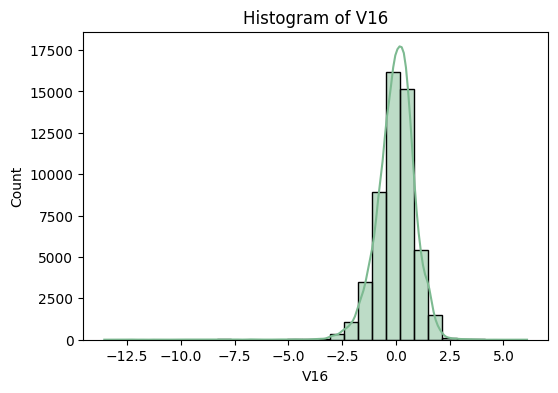

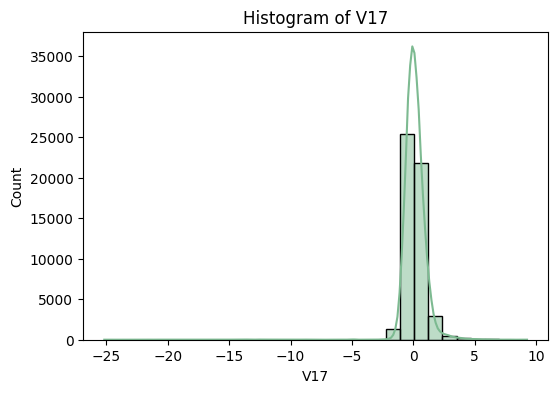

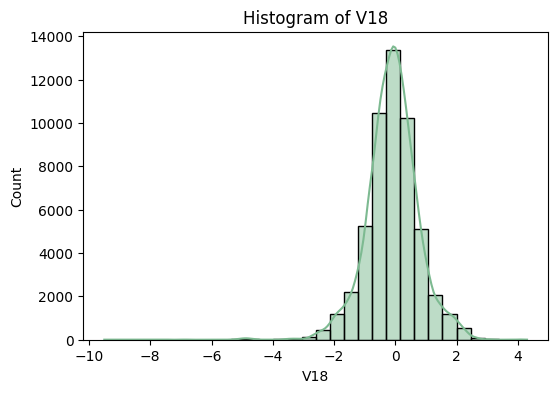

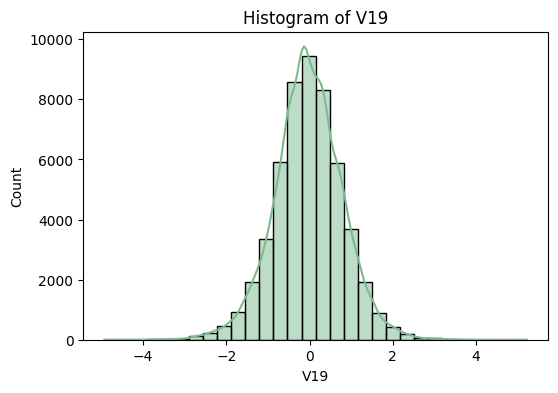

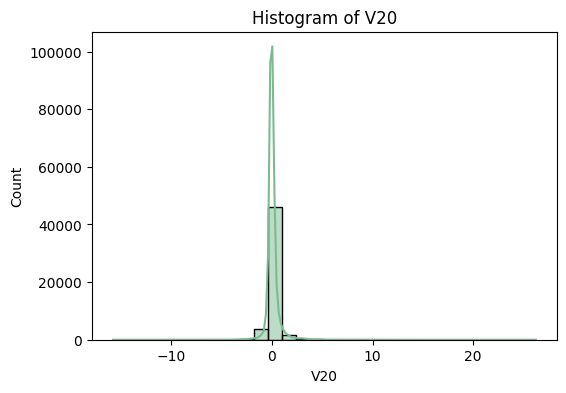

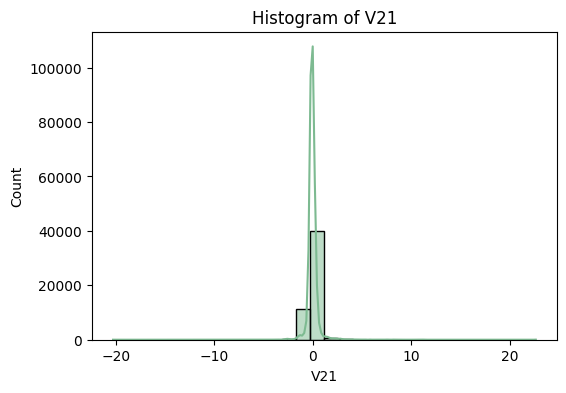

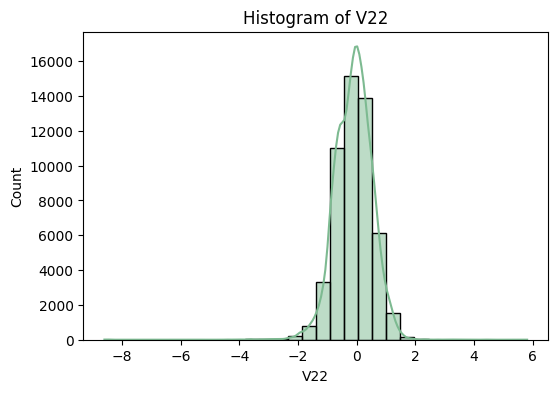

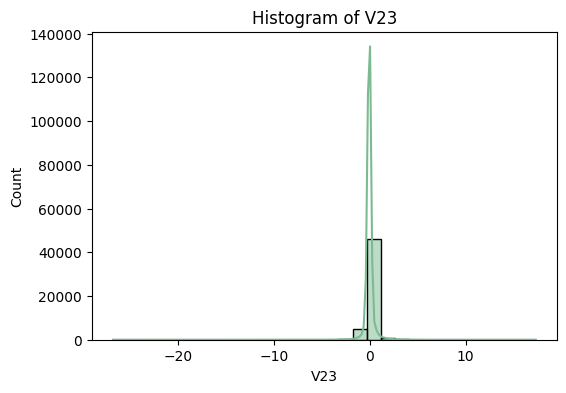

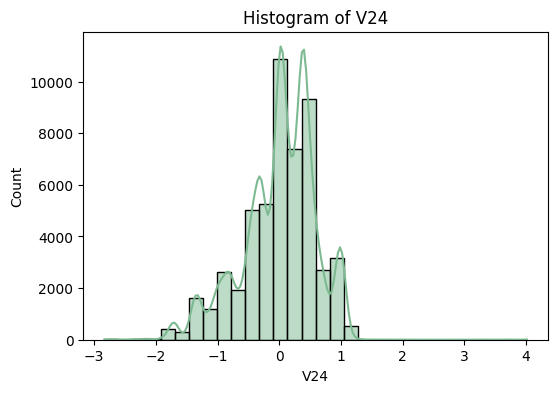

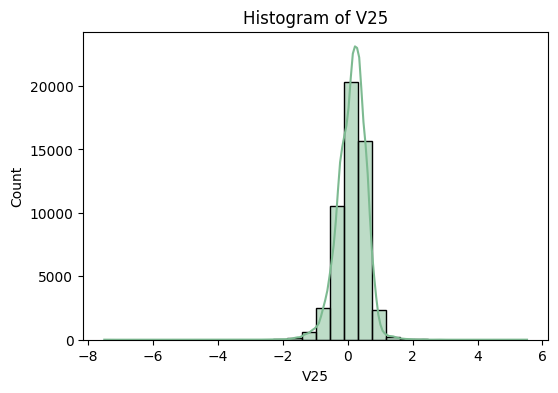

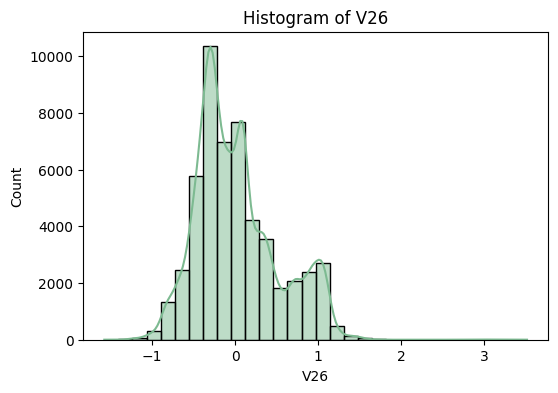

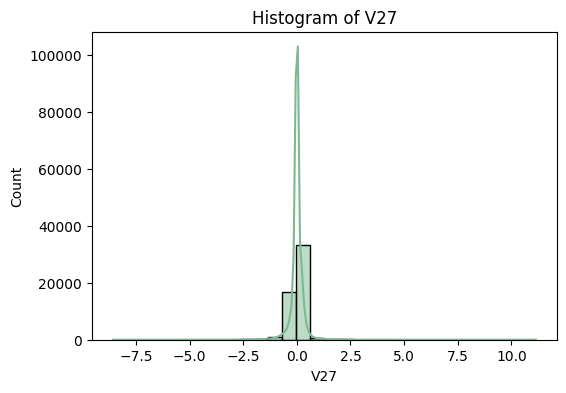

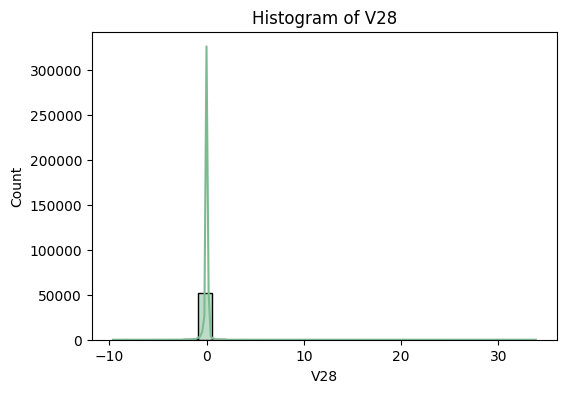

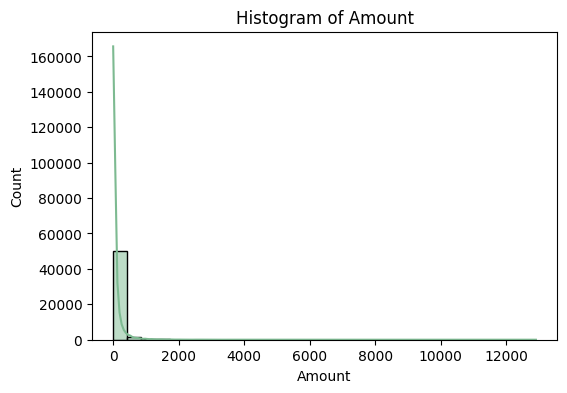

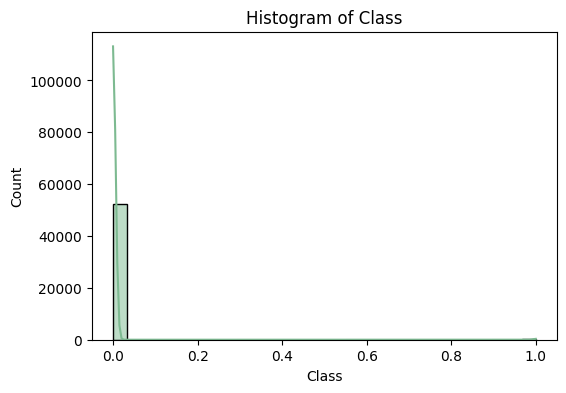

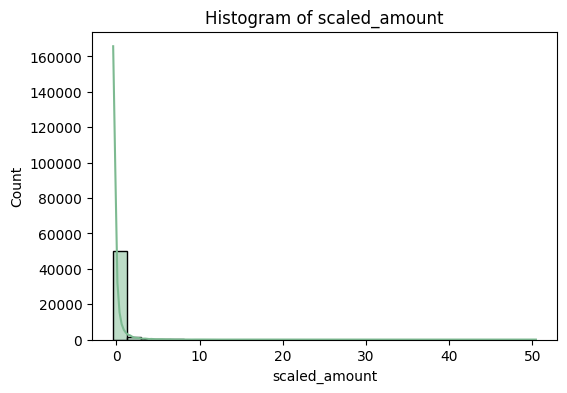

In [18]:
# Loop through all columns in the DataFrame and plot a histogram for each
for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True, color=sns.color_palette("crest")[0], bins=30)  # Apply color from 'crest' palette
    plt.xlabel(column)
    plt.title(f'Histogram of {column}')
    plt.show()

## STEP 12: Store Feature Matrix in X and response or target in Y

In [19]:
X = df.drop('Class', axis=1)
y = df['Class']

## STEP 13 : Splitting the dataset to training and test dataset

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
  print(X_train.shape)
  print(X_test.shape)

(41919, 30)
(10480, 30)


In [22]:
  print(y_train.shape)
  print(y_test.shape)

(41919,)
(10480,)


## STEP 14: Handling imbalanced dataset

In [23]:
# Undersampling
# Oversampling

## 14.1 Under Sampling

In [24]:
nonfraud= df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

In [25]:
nonfraud.shape

(52245, 31)

In [26]:
fraud.shape

(153, 31)

In [27]:
nonfraud_sample = nonfraud.sample(n=473)

In [28]:
nonfraud_sample.shape

(473, 31)

In [29]:
df_new = pd.concat([nonfraud_sample, fraud],ignore_index=True)

In [30]:
df_new.shape

(626, 31)

In [31]:
df_new['Class'].value_counts()

,count
Class,
0.0,473
1.0,153


In [32]:
df_new.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount
0,1.136699,-0.317312,0.891603,0.579014,-0.647670,0.502991,-0.689768,0.252253,0.694291,-0.090253,...,-0.109127,-0.113417,-0.454127,0.329631,0.346849,0.007499,0.014481,40.00,0.0,-0.218864
1,0.721058,-1.242912,-0.034289,0.717857,-1.172547,-0.786837,0.149556,-0.293154,-0.982501,0.695647,...,-0.329879,-0.363987,0.373294,0.514957,-0.250214,-0.023745,0.079865,332.35,0.0,0.931481
2,-2.184207,0.975153,0.785831,-0.634514,-0.454746,-0.093019,0.460788,0.195005,1.041183,0.487619,...,0.360072,-0.478613,-0.388739,0.190385,0.463784,0.163767,0.125424,97.50,0.0,0.007388
3,-3.326726,-5.031626,2.025639,-0.494412,3.354427,-3.112266,-3.081281,0.316560,-0.216708,0.604443,...,1.262133,0.909872,0.059188,-0.575335,-0.319335,-0.132570,0.060674,69.99,0.0,-0.100859
4,-0.306718,0.096960,0.535430,-2.350424,0.374109,0.674057,-0.038508,0.236373,-1.006112,0.370492,...,0.281690,-0.337760,-1.736120,0.121615,-0.308406,-0.258363,-0.027673,15.00,0.0,-0.317235


In [33]:
X = df_new.drop('Class', axis=1)
y = df_new['Class']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
print(X_train.shape)
print(X_test.shape)

(500, 30)
(126, 30)


In [36]:
print(y_train.shape)
print(y_test.shape)

(500,)
(126,)


In [37]:
print(y_train.value_counts())
print(y_test.value_counts())

Class
0.0    378
1.0    122
Name: count, dtype: int64
Class
0.0    95
1.0    31
Name: count, dtype: int64


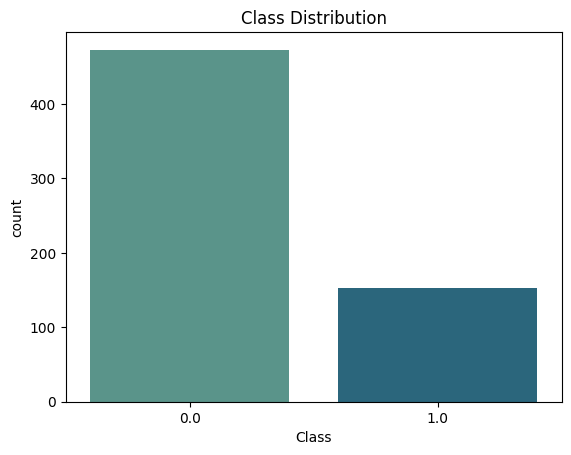

In [38]:
  sns.countplot(x='Class', data=df_new, palette='crest')
  plt.title('Class Distribution')
  plt.show()

## STEP 15 : Data Modelling

## 15.1 : Logistic Regression

In [39]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [40]:
y_pred1 = logreg.predict(X_test)

In [41]:
accuracy_score(y_test, y_pred1)

0.9603174603174603

In [42]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred1)

0.9333333333333333

In [43]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred1)

0.9032258064516129

In [44]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred1)

0.9180327868852459

## 15.2 : Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier


In [46]:
dt =DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
y_pred2 = dt.predict(X_test)

In [48]:
accuracy_score(y_test, y_pred2)

0.9285714285714286

In [49]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred2)

0.84375

In [50]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred2)

0.8709677419354839

In [51]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred2)

0.8571428571428571

## 15.3: Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
y_pred3 = rf.predict(X_test)

In [54]:
accuracy_score(y_test, y_pred3)

0.9603174603174603

In [55]:
precision_score(y_test, y_pred3)

0.9642857142857143

In [56]:
recall_score(y_test, y_pred3)

0.8709677419354839

In [57]:
f1_score(y_test, y_pred3)

0.9152542372881356

## 15.4 : SVM

In [58]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [59]:
y_pred4 = svm.predict(X_test)

In [60]:
accuracy_score(y_test, y_pred4)

0.8571428571428571

In [61]:
precision_score(y_test, y_pred4)

0.9333333333333333

In [62]:
recall_score(y_test, y_pred4)

0.45161290322580644

In [63]:
f1_score(y_test, y_pred4)

0.6086956521739131

In [64]:
final_data = pd.DataFrame({'Models':['logreg','DT','RF','svm'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100,
                     accuracy_score(y_test,y_pred4)*100
                    ]})

In [65]:
final_data

,Models,ACC
0,logreg,96.031746
1,DT,92.857143
2,RF,96.031746
3,svm,85.714286


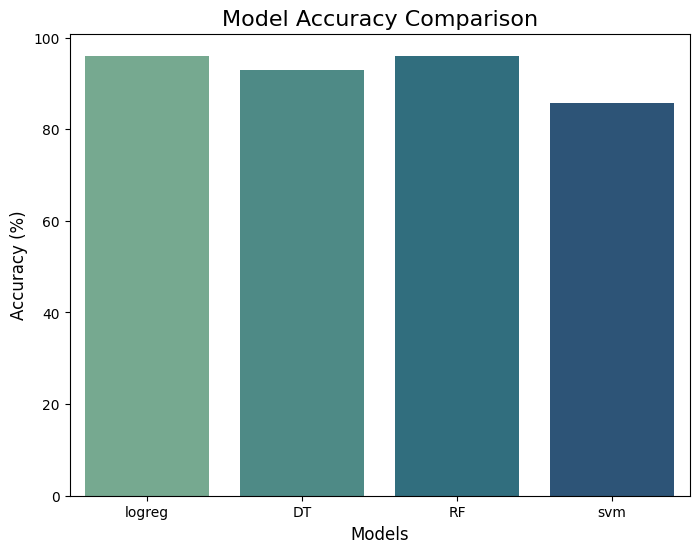

In [66]:
# Create the final_data DataFrame
final_data = pd.DataFrame({
    'Models': ['logreg', 'DT', 'RF', 'svm'],
    'ACC': [
        accuracy_score(y_test, y_pred1) * 100,
        accuracy_score(y_test, y_pred2) * 100,
        accuracy_score(y_test, y_pred3) * 100,
        accuracy_score(y_test, y_pred4) * 100  # Check if y_pred3 is correct for the last model
    ]
})

# Plotting the accuracy of different models
plt.figure(figsize=(8, 6))
sns.barplot(x='Models', y='ACC', data=final_data, palette='crest')

# Adding titles and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.show()

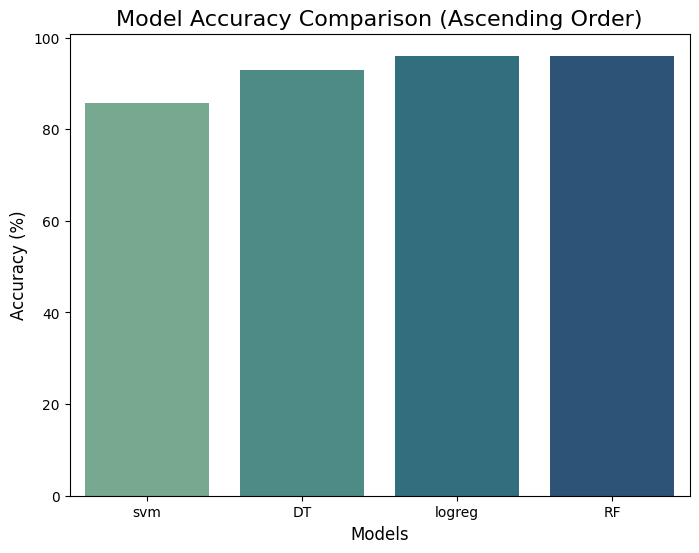

In [67]:
# Sort final_data by 'ACC' in ascending order
final_data_sorted = final_data.sort_values(by='ACC', ascending=True)

# Plotting the accuracy of different models
plt.figure(figsize=(8, 6))
sns.barplot(x='Models', y='ACC', data=final_data_sorted, palette='crest')

# Adding titles and labels
plt.title('Model Accuracy Comparison (Ascending Order)', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.show()

## STEP 16 : OverSampling

In [68]:
X = df.drop('Class', axis=1)
y = df['Class']

In [69]:
X.shape

(52399, 30)

In [70]:
y.shape

(52399,)

In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
# Remove rows with missing target values
X = X[~y.isnull()]
y = y.dropna()



In [73]:
# Apply SMOTE to the cleaned data
X_res, y_res = SMOTE().fit_resample(X, y)

In [74]:
y_res.value_counts()

,count
Class,
0.0,52245
1.0,52245


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [76]:
X_res.shape

(104490, 30)

In [77]:
y_res.shape

(104490,)

## 16.1 Logistic Regression

In [78]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [79]:
y_pred_11 = logreg.predict(X_test)

In [80]:
accuracy_score(y_test, y_pred_11)

0.9807158579768399

In [81]:
precision_score(y_test, y_pred_11)

0.9875551200391964

In [82]:
recall_score(y_test, y_pred_11)

0.9733436353100251

In [83]:
f1_score(y_test, y_pred_11)

0.9803978792742838

## 16.2: Decision Tree

In [84]:
dt =DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [85]:
y_pred_12 = dt.predict(X_test)

In [86]:
accuracy_score(y_test, y_pred_12)

0.9988994162120777

In [87]:
precision_score(y_test, y_pred_12)

0.9990339097671722

In [88]:
recall_score(y_test, y_pred_12)

0.9987444465906896

In [89]:
f1_score(y_test, y_pred_12)

0.9988891572084038

## 16.3: Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
from sklearn.ensemble import RandomForestClassifier

# Optimized Random Forest with reduced trees, shallow depth, parallelization, and feature subsetting
rf = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, max_features='sqrt')
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1)

In [92]:
y_pred_13 = rf.predict(X_test)

In [93]:
accuracy_score(y_test, y_pred_13)

0.9992343764953584

In [94]:
precision_score(y_test, y_pred_13)

0.9986494308315648

In [95]:
recall_score(y_test, y_pred_13)

0.9998068379370292

In [96]:
f1_score(y_test, y_pred_13)

0.9992277992277993

## 16.4 SVM

In [97]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit the model using LinearSVC (faster than SVC with 'linear' kernel)
svm = LinearSVC(max_iter=10000, C=1, random_state=42)
svm.fit(X_train_scaled, y_train)

LinearSVC(C=1, max_iter=10000, random_state=42)

In [98]:
y_pred_14 = svm.predict(X_test)

In [99]:
accuracy_score(y_test, y_pred_14)

0.6650875681883434

In [100]:
precision_score(y_test, y_pred_14)

0.6498704547485036

In [101]:
recall_score(y_test, y_pred_14)

0.7025304230249179

In [102]:
f1_score(y_test, y_pred_14)

0.67517519840349

In [104]:
final_data  = pd.DataFrame({'Models':['logreg','DT','RF','svm'],
              "ACC":[accuracy_score(y_test,y_pred_11)*1,
                     accuracy_score(y_test,y_pred_12)*1,
                     accuracy_score(y_test,y_pred_13)*1,
                     accuracy_score(y_test,y_pred_14)*1
                    ]})

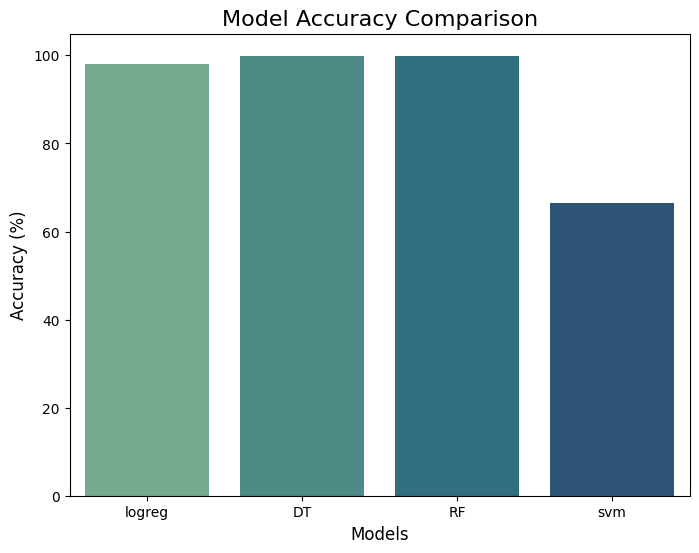

In [105]:
# Create the final_data DataFrame
final_data = pd.DataFrame({
    'Models': ['logreg', 'DT', 'RF', 'svm'],
    'ACC': [
        accuracy_score(y_test, y_pred_11) * 100,
        accuracy_score(y_test, y_pred_12) * 100,
        accuracy_score(y_test, y_pred_13) * 100,
        accuracy_score(y_test, y_pred_14) * 100  # Check if y_pred3 is correct for the last model
    ]
})

# Plotting the accuracy of different models
plt.figure(figsize=(8, 6))
sns.barplot(x='Models', y='ACC', data=final_data, palette='crest')

# Adding titles and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.show()

## STEP 17: Selecting the Best Model

In [107]:
rf1 = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, max_features='sqrt')
rf1.fit(X_res, y_res )

RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1)

In [108]:
import joblib

In [110]:
joblib.dump(rf1, 'creditcard_model')

['creditcard_model']

In [117]:
model = joblib.load('creditcard_model')

In [123]:
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

In [124]:
if pred == 0:
    print('Non-Fraudulent')
else:
    print('Fraudulent')

Non-Fraudulent
